In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
def save_plot_and_show(name, dir_path="plots"):
    """Сохраняет активную фигуру"""
    os.makedirs(dir_path, exist_ok=True)
    filepath = os.path.join(dir_path, f"{name}.png")
    plt.savefig(filepath, dpi=200, bbox_inches='tight')
    plt.show()
    plt.close()

In [3]:
train = pd.read_csv(f"data/train.csv")
test  = pd.read_csv(f"data/test.csv")
target = "delay_minutes"

In [4]:
print(train.shape)
print(test.shape)

(86671, 14)
(38577, 13)


In [5]:
def add_time_feats(df):
    x = 2*np.pi*(df["planned_arrival_min"]/1440.0)
    df = df.copy()
    df["time_sin"], df["time_cos"] = np.sin(x), np.cos(x)
    df["hour"] = (df["planned_arrival_min"]//60 % 24).astype(int)
    return df

train = add_time_feats(train)
test  = add_time_feats(test)
print(train.shape)

(86671, 17)


In [6]:
train.head(n=15)

,id,route_id,trip_id,stop_sequence,planned_arrival_min,weekday,is_holiday,distance_run_km,headway_min,temp_c,precip_mm,wind_mps,traffic_index,delay_minutes,time_sin,time_cos,hour
0,1,R00,R00_20240401_0302,0,302.00,0,0,0.000,19.45,9.51,0.0,0.3,2.9,2.35,0.968148,0.250380,5
1,2,R00,R00_20240401_0302,1,303.88,0,0,0.443,19.45,9.51,0.0,0.3,2.9,0.81,0.970169,0.242430,5
2,3,R00,R00_20240401_0302,2,307.68,0,0,1.489,19.45,9.51,0.0,0.3,2.9,1.24,0.974055,0.226311,5
3,4,R00,R00_20240401_0302,3,310.80,0,0,2.323,19.45,9.51,0.0,0.3,2.9,1.74,0.977046,0.213030,5
4,5,R00,R00_20240401_0302,4,313.51,0,0,3.026,19.45,9.51,0.0,0.3,2.9,0.10,0.979496,0.201463,5
5,6,R00,R00_20240401_0302,5,316.15,0,0,3.706,19.45,9.51,0.0,0.3,2.9,0.00,0.981752,0.190166,5
6,7,R00,R00_20240401_0302,6,318.07,0,0,4.162,19.45,9.51,0.0,0.3,2.9,1.29,0.983311,0.181935,5
7,8,R00,R00_20240401_0302,7,320.47,0,0,4.768,19.45,9.51,0.0,0.3,2.9,0.00,0.985162,0.171628,5
8,9,R00,R00_20240401_0302,8,323.80,0,0,5.667,19.45,9.51,0.0,0.3,2.9,1.37,0.987551,0.157296,5
9,10,R00,R00_20240401_0302,9,325.79,0,0,6.145,19.45,9.51,0.0,0.3,2.9,1.71,0.988880,0.148716,5


In [7]:
print(f"Всего NaN значений: {train.isna().sum().sum()}")

Всего NaN значений: 0


In [8]:
print(train['headway_min'].describe())

count    86671.000000
mean        13.967933
std          2.805672
min          6.060000
25%         11.900000
50%         13.710000
75%         15.930000
max         23.660000
Name: headway_min, dtype: float64


In [9]:
train[target].describe()

count    86671.000000
mean         2.125512
std          1.721890
min          0.000000
25%          0.720000
50%          1.880000
75%          3.190000
max         11.180000
Name: delay_minutes, dtype: float64

In [26]:
plt.rcParams.update({
    'font.size': 14,           # Размер основного шрифта
    'axes.titlesize': 16,      # Размер заголовков осей
    'axes.labelsize': 16,      # Размер подписей осей
    'xtick.labelsize': 14,     # Размер подписей по оси X
    'ytick.labelsize': 14,     # Размер подписей по оси Y
    'legend.fontsize': 12,     # Размер шрифта легенды
})

In [28]:
# 1. Группируем по trip_id и проверяем уникальные значения headway_min в каждой группе
headway_consistency = train.groupby('trip_id')['headway_min'].agg(['nunique', 'var']).reset_index()

# 2. Статистика по уникальности
print("Распределение количества уникальных значений headway_min в рамках одного рейса:")
print(headway_consistency['nunique'].value_counts().sort_index())

print(f"\nПроцент рейсов, где headway_min постоянен: "
      f"{(headway_consistency['nunique'] == 1).mean() * 100:.2f}%")

Распределение количества уникальных значений headway_min в рамках одного рейса:
nunique
1    6554
Name: count, dtype: int64

Процент рейсов, где headway_min постоянен: 100.00%


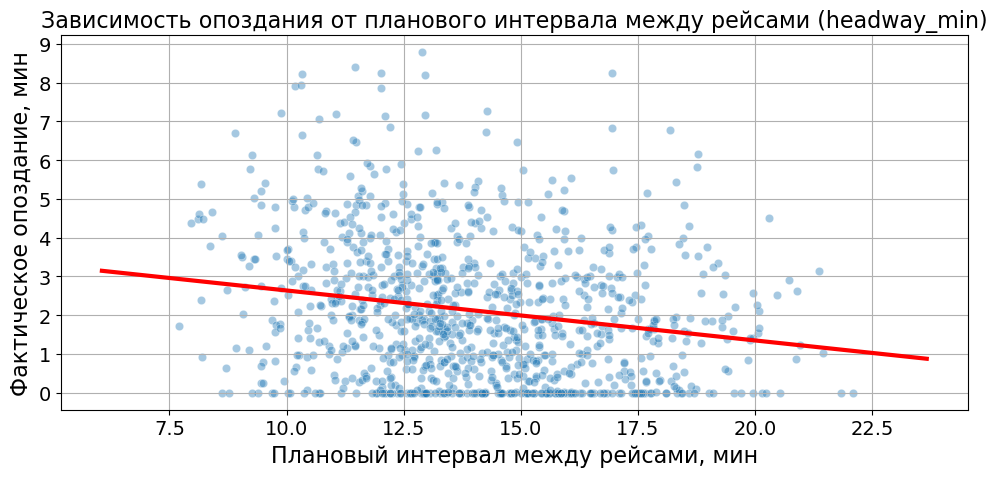

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train.sample(1000), x='headway_min', y='delay_minutes', alpha=0.4)
sns.regplot(data=train, x='headway_min', y='delay_minutes', scatter=False, color='red', line_kws={"linewidth": 3})
plt.title('Зависимость опоздания от планового интервала между рейсами (headway_min)')
plt.xlabel('Плановый интервал между рейсами, мин')
plt.ylabel('Фактическое опоздание, мин')
plt.yticks([x for x in range(0, 10)])
plt.grid(True)
plt.tight_layout()
save_plot_and_show("headway_vs_delay")

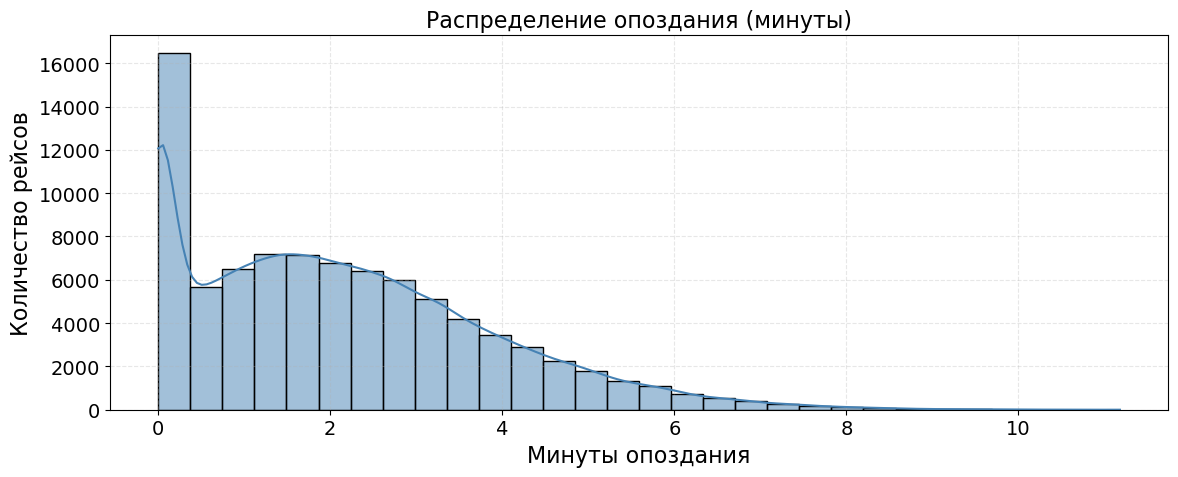

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.histplot(data=train, x='delay_minutes', kde=True, ax=ax, 
             bins=30, color='steelblue', edgecolor='black')
ax.set_title('Распределение опоздания (минуты)')
ax.set_xlabel('Минуты опоздания')
ax.set_ylabel('Количество рейсов')
ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

save_plot_and_show("delay_distribution")

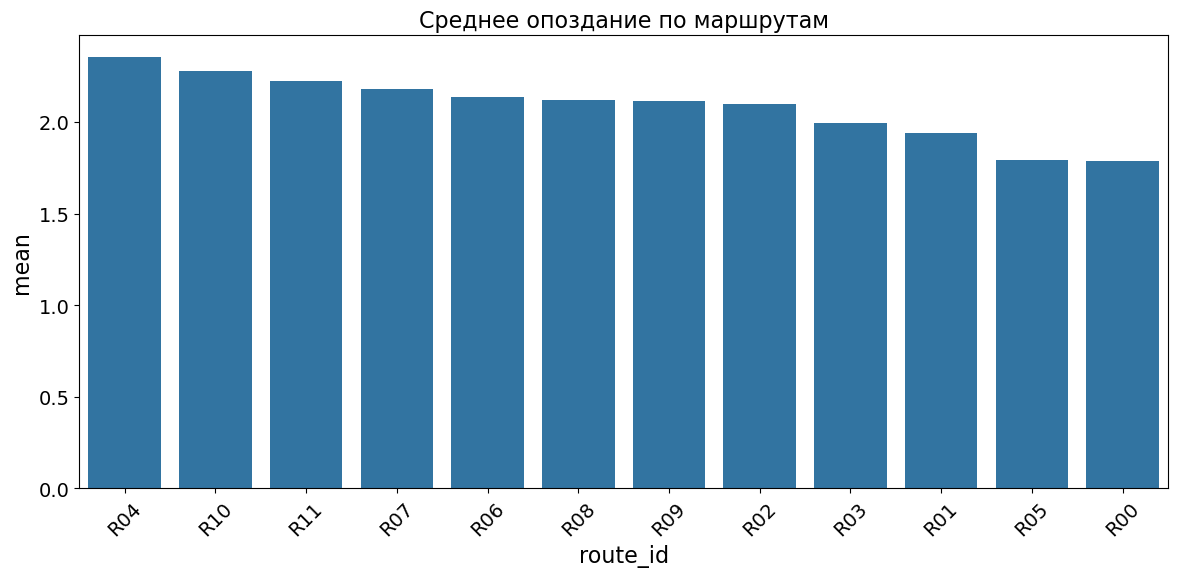

In [29]:
route_delay = train.groupby('route_id')['delay_minutes'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=route_delay.index, y=route_delay['mean'])
plt.xticks(rotation=45)
plt.title('Среднее опоздание по маршрутам')
plt.tight_layout()
save_plot_and_show("mean_delay_by_routes")

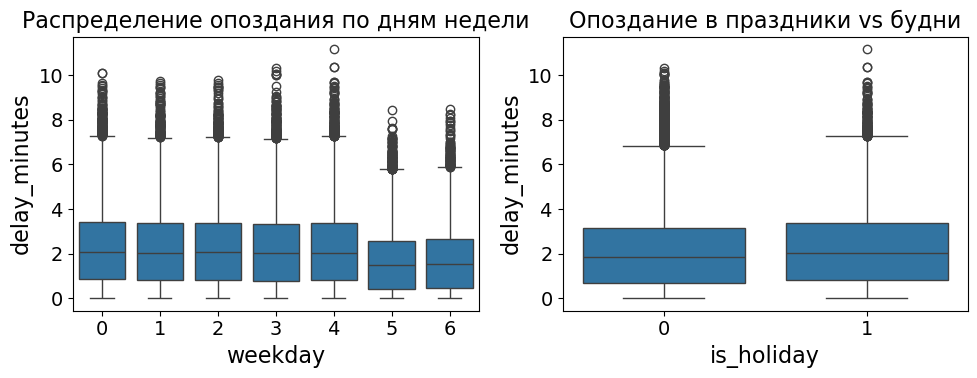

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data=train, x='weekday', y='delay_minutes', ax=axes[0])
axes[0].set_title('Распределение опоздания по дням недели')
sns.boxplot(data=train, x='is_holiday', y='delay_minutes', ax=axes[1])
axes[1].set_title('Опоздание в праздники vs будни')
plt.tight_layout()
save_plot_and_show("delay_distribution_by_weekday_holidays")

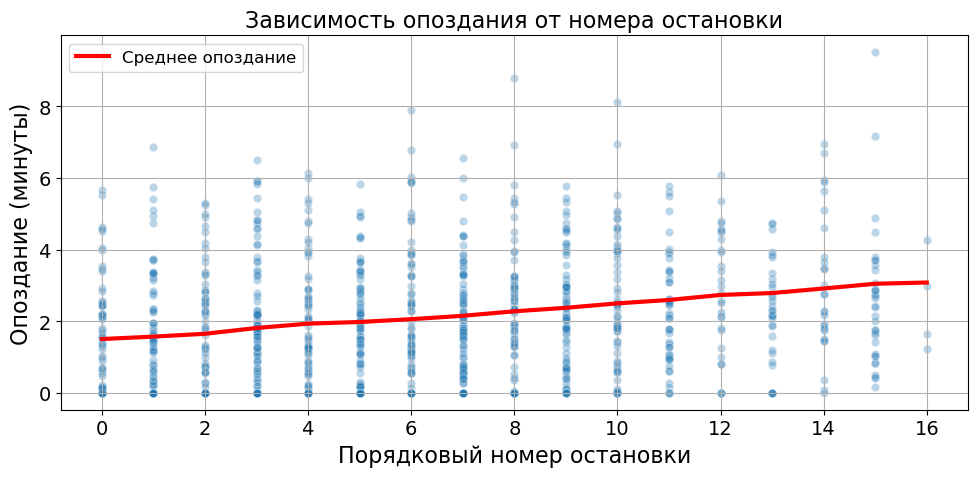

In [31]:
plt.figure(figsize=(10, 5))
# Можно через scatterplot с небольшим альфа-каналом
sns.scatterplot(data=train.sample(1000), x='stop_sequence', y='delay_minutes', alpha=0.3)
# Или через агрегацию (более четко)
stop_delay = train.groupby('stop_sequence')['delay_minutes'].mean()
plt.plot(stop_delay.index, stop_delay.values, 'r-', linewidth=3, label='Среднее опоздание')
plt.title('Зависимость опоздания от номера остановки')
plt.xlabel('Порядковый номер остановки')
plt.ylabel('Опоздание (минуты)')
plt.legend()
plt.grid(True)
plt.tight_layout()
save_plot_and_show("delay_corr_with_stop_num")

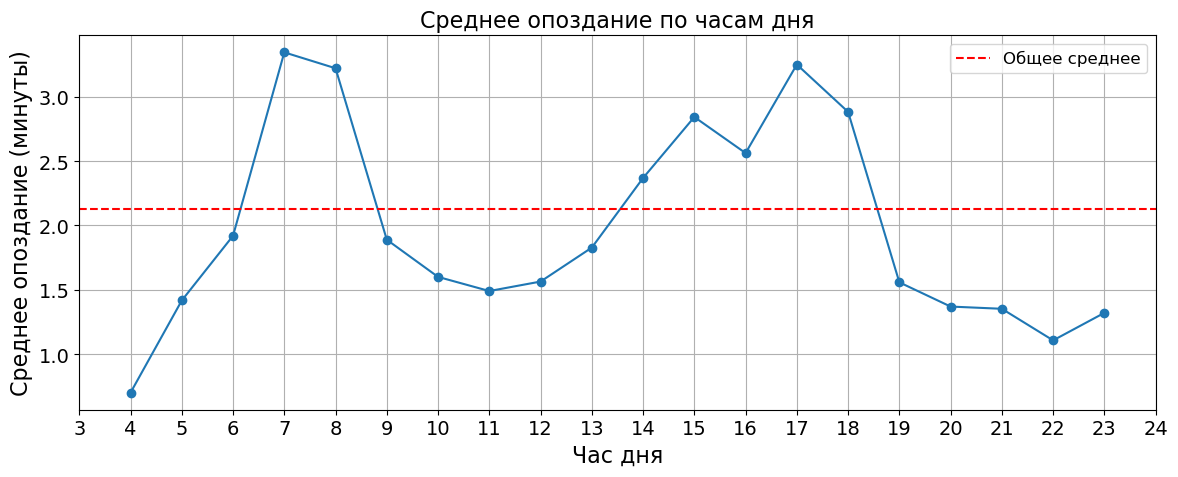

In [32]:
# Переведем минуты в часы для наглядности
hour_delay = train.groupby('hour')['delay_minutes'].mean()
plt.figure(figsize=(12, 5))
plt.plot(hour_delay.index, hour_delay.values, marker='o')
plt.axhline(y=train['delay_minutes'].mean(), color='r', linestyle='--', label='Общее среднее')
plt.title('Среднее опоздание по часам дня')
plt.xlabel('Час дня')
xticks = [x for x in range(3, 25)]
plt.xticks(ticks=xticks)
plt.ylabel('Среднее опоздание (минуты)')
plt.legend()
plt.grid(True)
plt.tight_layout()
save_plot_and_show("delay_distribution_by_hours")

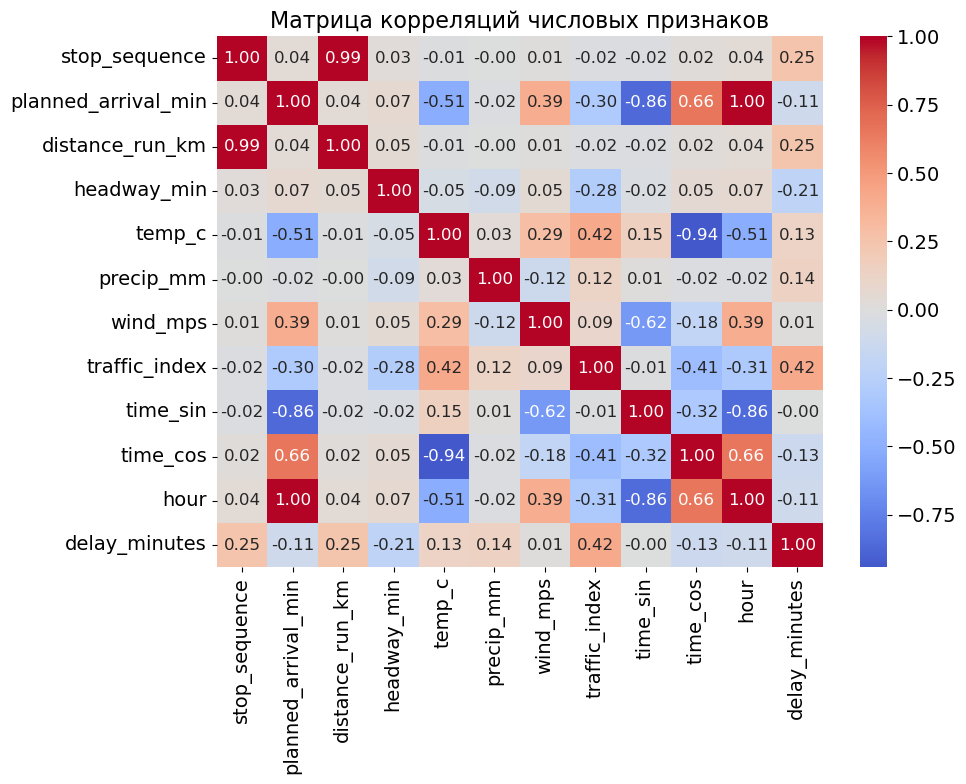

In [33]:
plt.rcParams.update({
    'font.size': 12,           # Размер основного шрифта
    'axes.titlesize': 16,      # Размер заголовков осей
    'axes.labelsize': 14,      # Размер подписей осей
    'xtick.labelsize': 14,     # Размер подписей по оси X
    'ytick.labelsize': 14,     # Размер подписей по оси Y
    'legend.fontsize': 12,     # Размер шрифта легенды
})
# Выбираем числовые признаки, включая целевую
num_cols = ["stop_sequence","planned_arrival_min","distance_run_km","headway_min","temp_c","precip_mm","wind_mps",
       "traffic_index","time_sin","time_cos","hour","delay_minutes"]
plt.figure(figsize=(10, 8))
corr_matrix = train[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых признаков')
plt.tight_layout()
save_plot_and_show("corr_matrix")